In [1]:
import squidpy as sq
import scanpy as sc
import spatialdata as sd
import spatialdata_plot
from pathlib import Path
import seaborn as sns
import pandas as pd
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# https://nanostring.com/products/cosmx-spatial-molecular-imager/ffpe-dataset/
nanostring_dir = '/home/hanyue/code/biomecha/data/large_data/CosMx/Quarter_Brain/'

adata = sq.read.nanostring(
    path=nanostring_dir,
    counts_file="Run5642_S3_Quarter_exprMat_file.csv",
    meta_file="Run5642_S3_Quarter_metadata_file.csv",
    fov_file="Run5642_S3_Quarter_fov_positions_file.csv",
)


In [3]:
runLabel = 'CosMx_Mouse_Brain_quarter'
save_path = '/home/hanyue/code/biomecha/data/large_data/Results/' + runLabel+'_neighbor10_TEST'
Path(save_path).mkdir(parents=True, exist_ok=True)
adata

AnnData object with n_obs × n_vars = 38996 × 960
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.Histone', 'Max.Histone', 'Mean.G', 'Max.G', 'Mean.rRNA', 'Max.rRNA', 'Mean.GFAP', 'Max.GFAP', 'Mean.DAPI', 'Max.DAPI', 'cell_ID'
    uns: 'spatial'
    obsm: 'spatial', 'spatial_fov'

In [4]:
adata.obs[['fov', 'cell_ID', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height']]

,fov,cell_ID,Area,AspectRatio,CenterX_global_px,CenterY_global_px,Width,Height
1_1,1,1,4706,0.72,171430.000000,15555.666667,61,85
2_1,1,2,2100,2.70,171704.000000,15581.666667,89,33
3_1,1,3,6936,1.82,171866.000000,15561.666667,133,73
4_1,1,4,9562,0.86,172234.000000,15539.666667,101,117
5_1,1,5,8944,1.85,172554.000000,15555.666667,157,85
...,...,...,...,...,...,...,...,...
710_66,66,710,8989,1.65,129384.333333,-9938.666667,173,105
711_66,66,711,1562,1.04,132829.333333,-9936.666667,49,47
712_66,66,712,2365,2.22,129606.333333,-9970.666667,91,41
713_66,66,713,1872,3.96,132097.333333,-9978.666667,99,25


In [5]:
adata.obsm['spatial_raw'] = adata.obsm['spatial'].copy()
adata.obsm['spatial'] = adata.obsm['spatial_fov'].copy()

In [6]:
adata.obsm['spatial'][:, 1] =  - adata.obsm['spatial_fov'][:, 1]

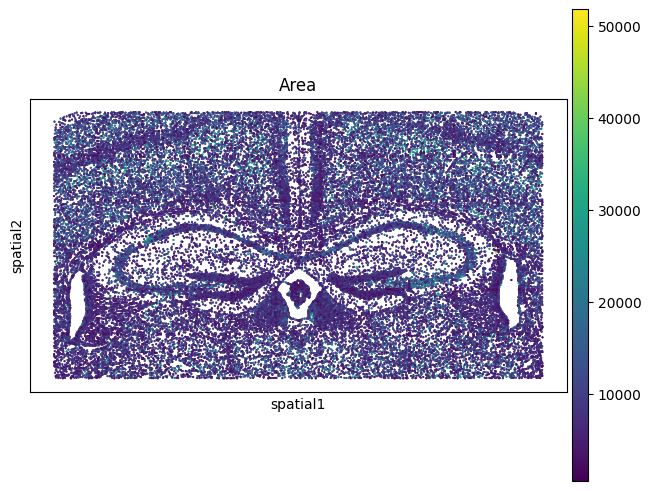

In [7]:
sq.pl.spatial_scatter(adata, shape=None, color="Area", size=1, library_id='spatial')

In [8]:
adata.obsm['spatial'] = 0.12 * adata.obsm['spatial']

In [9]:
adata.obsm['spatial']
adata_raw = adata.copy()

## 可以从这里读入adata开始

# Preprocessing

In [10]:
import sys
sys.path.append('/home/hanyue/code/biomecha/SpatialZoomer/SpatialZoomer_clean/')
from Preprocessing  import *

### QC过程不用打包函数，每个技术的QC指标命名不同

/tmp/ipykernel_10421/4131510544.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby("fov").sum()["total_counts"],


<Axes: title={'center': 'Volume of segmented cells'}, xlabel='Area', ylabel='Count'>

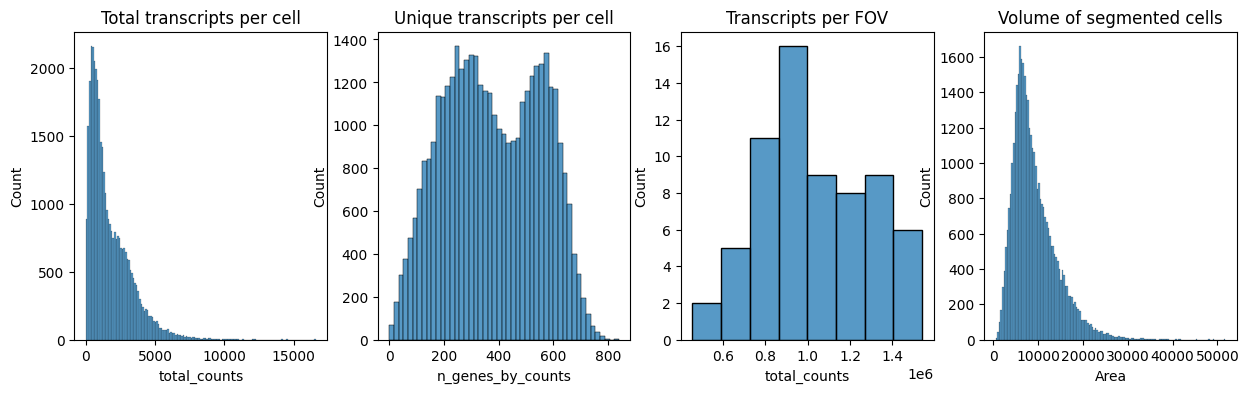

In [11]:
sc.pp.calculate_qc_metrics(adata, percent_top=(50, 100, 200, 300), inplace=True)
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)

axs[2].set_title("Transcripts per FOV")
sns.histplot(
    adata.obs.groupby("fov").sum()["total_counts"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("Volume of segmented cells")
sns.histplot(
    adata.obs["Area"],
    kde=False,
    ax=axs[3],
)

In [12]:
sc.pp.filter_cells(adata, min_counts = 100)
sc.pp.filter_cells(adata, min_genes = 10)
sc.pp.filter_genes(adata, min_cells = 5)
adata = Preprocess(adata)
adata
# 38996 

AnnData object with n_obs × n_vars = 38251 × 960
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.Histone', 'Max.Histone', 'Mean.G', 'Max.G', 'Mean.rRNA', 'Max.rRNA', 'Mean.GFAP', 'Max.GFAP', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_300_genes', 'n_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'spatial', 'log1p'
    obsm: 'spatial', 'spatial_fov', 'spatial_raw'
    layers: 'counts'

# Heat kernel-based Spectral Graph Filter Bank (SGFB)

In [13]:
from Spectral_graph_filter_bank import *
import importlib
importlib.reload(sys.modules['Spectral_graph_filter_bank'])

<module 'Spectral_graph_filter_bank' from '/home/hanyue/code/biomecha/SpatialZoomer/SpatialZoomer_clean/Spectral_graph_filter_bank.py'>

In [14]:
n_neighbors = 10
adata = performDR(adata, type = 'NMF', n_components=50)
adata = getKNN(adata, use_rep = 'spatial', name = 'spatial_knn', n_neighbors = n_neighbors, pattern='auto')
adata = getKNN(adata, use_rep = 'X_nmf', name = 'expr_knn', n_neighbors = n_neighbors)

scales = [0.01] + np.arange(0.1, 2.1, 0.1).tolist() + np.arange(2.5, 15.5, 0.5).tolist() + np.arange(16, 21, 1).tolist() +  np.arange(25, 55, 5).tolist()
scales = [round(x, 2) for x in scales]
transformed_signals, scales = performSGFB(adata, use_knn = 'spatial_knn', use_rep = 'X_nmf', scales = scales, runLabel = runLabel, save_path = save_path)
print(transformed_signals.shape)

/home/hanyue/anaconda3/envs/py310bio/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Time taken to perform NMF: 179.0391 seconds
Maximum similarities:  45.642685249997946
Minimum similarities:  1.2569474955253868
Median similarities:  4.999999999980174
time taken to construct spatial_knn: 0.1920 seconds
Maximum similarities:  1972.0965922122352
Minimum similarities:  208.47349002481957
Median similarities:  505.81748465501
time taken to construct expr_knn: 1.2294 seconds
Time taken to perform spectral graph filter bank: 19.4916 seconds
Transformed signals saved to /home/hanyue/code/biomecha/data/large_data/Results/CosMx_Mouse_Brain_quarter_neighbor10_TEST/CosMx_Mouse_Brain_quarter_transformed_signals.h5
(38251, 50, 58)


# Identify typical scales

In [ ]:
from Identify_typical_scales import *

In [16]:
from matplotlib import rcParams
import matplotlib as mpl  
config = {
    "font.family":'sans-serif',
    "font.size": 6,
    "mathtext.fontset":'stix',
    "font.serif": ['MS Arial'],
}
rcParams.update(config)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

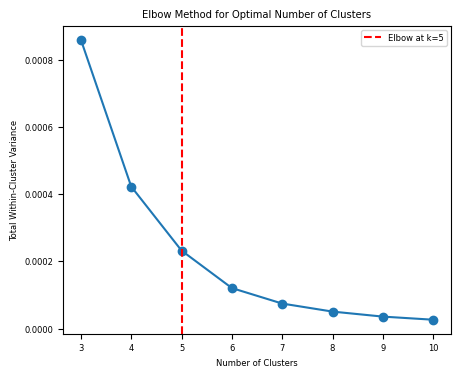

The optimal number of clusters is: 5


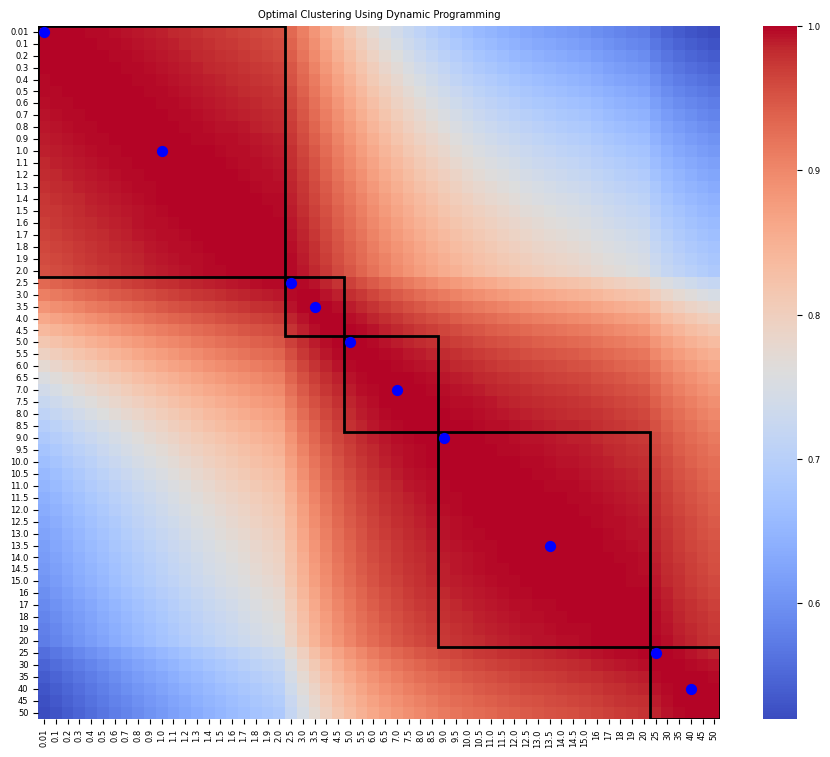

Optimal clusters (start, end): [(0, 20), (21, 25), (26, 33), (34, 51), (52, 57)]
Cluster centers: [1.0, 3.5, 7.0, 13.5, 40]
Typical scales: [0.01, 1.0, 2.5, 3.5, 5.0, 7.0, 9.0, 13.5, 25, 40]
Time taken to perform identification of typical scales: 7.2445 seconds


,Index,Scale
0,0,0.01
1,10,1.00
2,21,2.50
3,23,3.50
4,26,5.00
5,30,7.00
6,34,9.00
7,43,13.50
8,52,25.00
9,55,40.00


In [17]:
mean_correlation_matrix, optimal_clusters, typical_scales_df = Identify_Typical_Scales(transformed_signals, scales, max_clusters = 10, min_clusters = 3, 
                                                                             save_path = save_path+'/'+ runLabel )
typical_scales_df 

# Clustering

In [18]:
from Two_step_Clustering import *
import importlib
importlib.reload(sys.modules['Two_step_Clustering'])


<module 'Two_step_Clustering' from '/home/hanyue/code/biomecha/SpatialZoomer/SpatialZoomer_clean/Two_step_Clustering.py'>

In [19]:
resolutions = [0.4, 0.6, 0.8, 1, 1.2]
adata = Clustering_raw_signal(adata, use_rep = 'X_nmf',  n_clusters_kmeans = 10000, resolutions = resolutions, title = 'Raw', save_path = save_path, runLabel = runLabel)

Time taken to perform UMAP and clustering for raw signal: 155.1538 seconds


In [20]:
adata = Clustering_transformed_signal(adata, transformed_signals, typical_scales_df, n_clusters_kmeans = 10000, resolutions = resolutions, save_path = save_path, runLabel = runLabel)

Time taken to perform clustering for signal at scale 0.01: 133.2895 seconds
Time taken to perform clustering for signal at scale 1.0: 131.5729 seconds
Time taken to perform clustering for signal at scale 2.5: 139.4366 seconds
Time taken to perform clustering for signal at scale 3.5: 133.2729 seconds
Time taken to perform clustering for signal at scale 5.0: 139.4580 seconds
Time taken to perform clustering for signal at scale 7.0: 131.4295 seconds
Time taken to perform clustering for signal at scale 9.0: 132.7075 seconds
Time taken to perform clustering for signal at scale 13.5: 130.9905 seconds
Time taken to perform clustering for signal at scale 25.0: 139.5539 seconds
Time taken to perform clustering for signal at scale 40.0: 134.0250 seconds
Total time: 1345.8361 seconds


# Identify simpson index

In [24]:
from Simpson_Index import *
importlib.reload(sys.modules['Simpson_Index'])


<module 'Simpson_Index' from '/home/hanyue/code/biomecha/SpatialZoomer/SpatialZoomer_clean/Simpson_Index.py'>

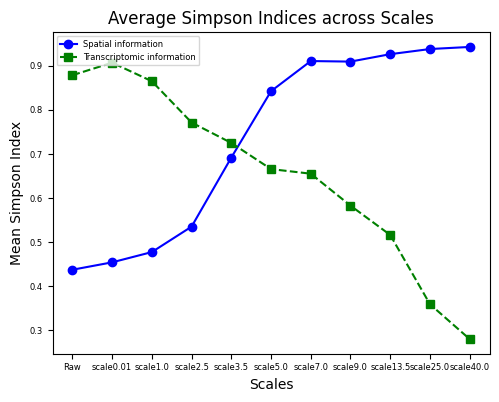

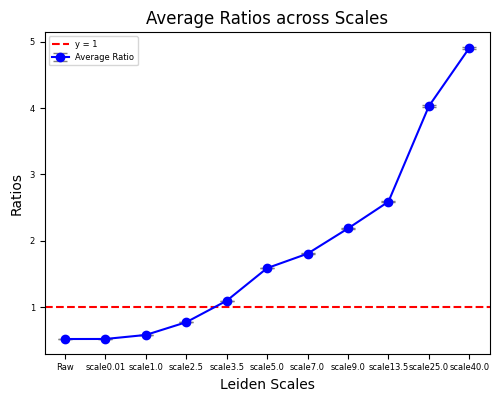

In [25]:
typical_scales = typical_scales_df['Scale'].values
scales_plot = ['Raw'] + ['scale' + str(scale) for scale in typical_scales]
clusters_use = ['leiden_' + str(scale) + '_res1' for scale in scales_plot]
simpson_spatial_dict, simpson_expr_dict, ratios_dict = plot_simpson_indices(adata, scales_plot, clusters_use, save_path = save_path+'/')


In [ ]:
adata.write(save_path + '/' + runLabel +'_SpatialZoomer_anndata.h5ad')